# Vremenski zavisna Furijeova transformacija

Za određivanje STFT signala u Python-u je moguće korisiti funkciju <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html">stft</a> iz scipy.signal biblioteke.

## Zadaci

1. Dat je frekvencijski modulisan signal $x(t) = cos(2\pi \mu t^2)$ . Generisati odmjerke ovog signala na intervalu $t = 0$ do $t =100 \mu s$ . Uzeti da je $\mu = 2.4 \times 10^{10}$, a frekvencija odmjeravanja iznosi $10MHz$. Nacrtati signal u vremenskom domenu korištenjem naredbe plot.

In [26]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as pyplot
import scipy.signal as signal
import numpy.fft as fft
import scipy.signal.windows as windows

<IPython.core.display.Javascript object>


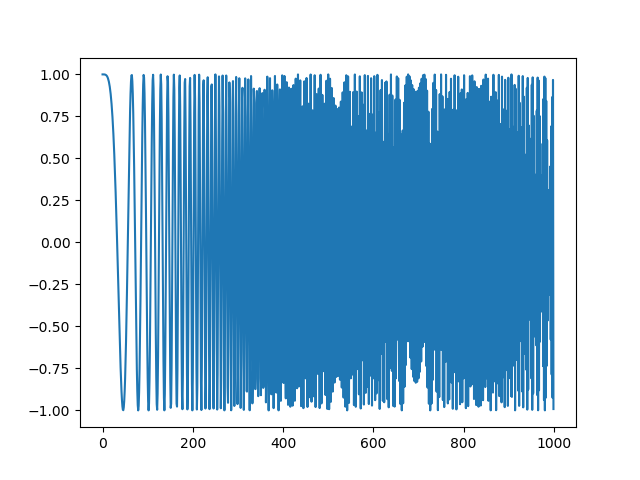

In [27]:
### KOD
FS = 10 * 10 ** 6
mi = 2.4 * 10 ** 10
dt = 1 / FS
n = np.arange(0, 100 * 10 ** (-6), dt)
x = np.cos(2 * np.pi * mi * n ** 2 )
pyplot.figure()
pyplot.plot(x)

2. Odrediti trenutnu frekvenciju ovog signala i njenu maksimalnu vrijednost.

<IPython.core.display.Javascript object>


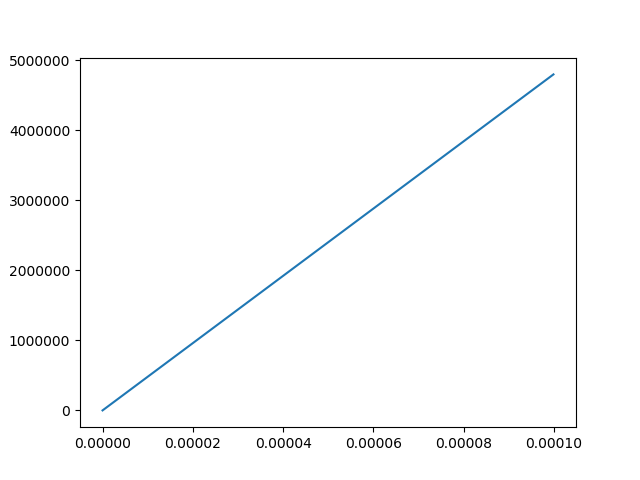

In [28]:
f = 2 * mi * n
pyplot.figure()
pyplot.plot(n, f)

3. Nacrtati spektrogram signala iz tačke 1. Iskoristiti Hanov prozor dužine 128. Pomak prozora treba da iznosi 8 odmjeraka, a FFT računati u 512 tačaka uz dopunjavanje nulama.

<IPython.core.display.Javascript object>


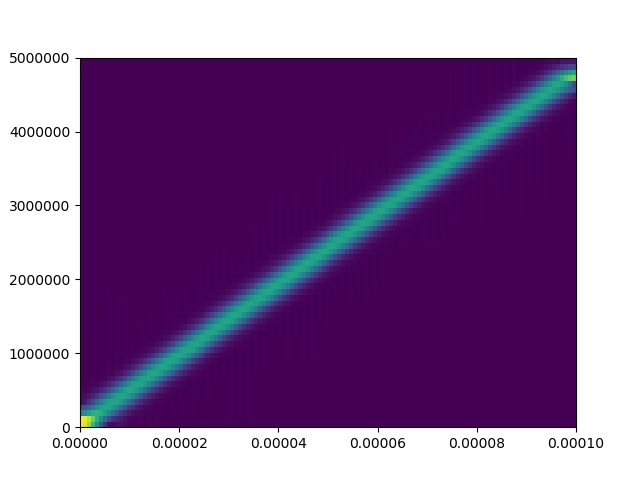

In [29]:
### KOD
f, t, X = signal.stft(x, FS, nperseg=128, 
                           window=signal.hamming(128),
                           noverlap=120,
                           boundary='even')
pyplot.figure()
pyplot.pcolormesh(t, f, np.abs(X))

4. Kako se na osnovu spektrograma može odrediti trenutna frekvencija ovog signala? Odrediti njenu vrijednost i uporediti sa rezultatom iz tačke 2.

5. Nacrtati spektar signala koji se dobija za prozor pomjeren u $40\mu s$.

<IPython.core.display.Javascript object>


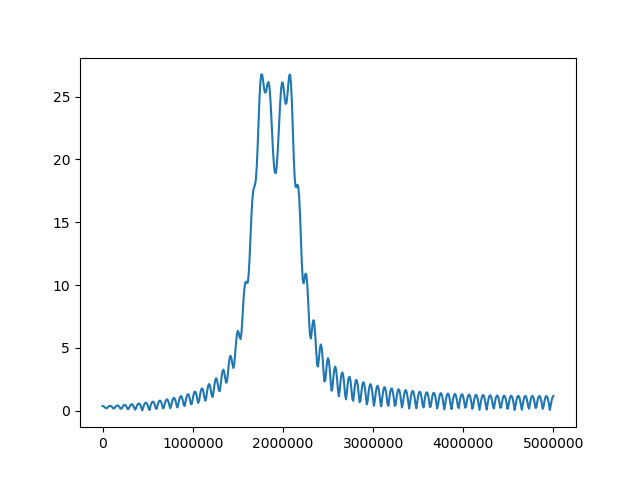

In [54]:
### KOD
win = windows.boxcar(128)
delay = 40 * 10 ** (-6)
zeros = round(FS * delay) - len(win) // 2
win = np.pad(win, (zeros, len(x) - len(win) - zeros), mode = "constant", constant_values = 0) 
X = fft.rfft(x * win)
w = fft.rfftfreq(len(x), 1 / FS)
pyplot.figure()
pyplot.plot(w, np.abs(X))

6. Ponoviti tačke 1-5 za različite vrijednosti parametra $\mu$.

## Uticaj dužine prozora na rezoluciju u vremenu i frekvenciji

1. Generisati 256 odmjeraka signala datog jednačinom
$$
x(n) = \begin{cases}
      10, & n=79 \\
      cos(0.15\pi n), & \text{inače}
    \end{cases}.
$$
Nacrtati signal u vremenskom domenu.

<IPython.core.display.Javascript object>


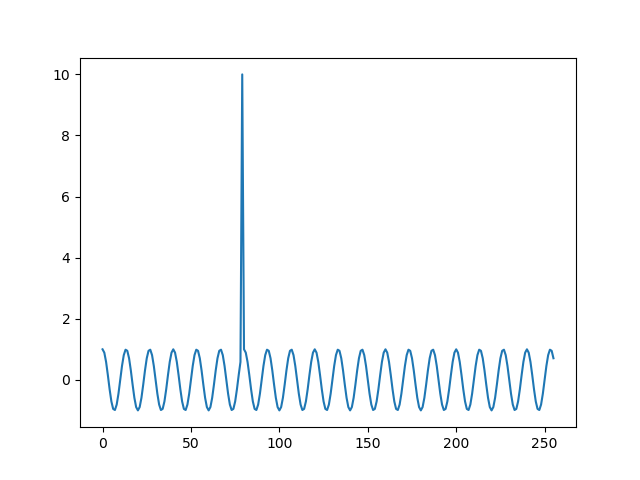

In [22]:
### KOD
n1 = np.arange(79)
n2 = np.arange(80, 256)
x = np.concatenate((np.cos(0.15 * np.pi * n1), np.array([10]), np.cos(0.15 * np.pi * n2)))
pyplot.figure()
pyplot.plot(x)

2. Nacrtati spektrograme signala iz tačke 1. Iskoristiti Hemingove prozore dužine 8, 32, 64 i 128 odmjeraka. Pomak prozora treba da iznosi 1 odmjerak, a FFT računati u 512 tačaka uz dopunjavanje nulama. Signal je definisan kao diskretan pa se za frekvenciju odmjeravanja može iskoristiti vrijednost 1Hz.

In [4]:
### KOD

3. Na osnovu dobijenih spektrograma ustanoviti na koji način rezolucija u vremenu, odnosno, frekvenciji zavisi od dužine prozora.

4. Fiksirati sada dužinu bloka (prozora) na 32 odmjerka, FFT računati u 32 i 256 tačaka, a pomaci prozora treba da iznose 1 i 10 odmjeraka. Nacrtati spektrograme.

In [5]:
### KOD

5. Da li rezolucija zavisi od pomaka prozora i broja tačaka u kojima se računa FFT?

## Spektrogram govornog signala

1. Učitati signal <i>iaeao.wav</i> u Python. Prikazati signal u vremenskom domenu korištenjem naredbe plot. Identifikovati intervale tišine na početku i na kraju uzorka signala (fajla) i formirati novi signal isjecanjem ovih intervala. Prikazati dobijeni signal u vremenskom domenu.

In [6]:
### KOD

2. Pošto se govorni signal za samoglasnike u prvoj aproksimaciji može modelovati izlazom iz filtra pobuđenog nizom impulsa, njegov talasni oblik je kvaziperiodičan i njegova Furijeova transformacija ima dvije karakteristične osobine. Prvo, spektralni oblik filtra vokalnog trakta bi trebalo da bude vidljiv u nekoliko (manje od 5) velikih rezonantnih pikova. Drugo, spektar bi trebalo da se sastoji od mnogo linija na jednakim razmacima zbog kvaziperiodičnosti signala sa periodom (pitch period) od približno $10ms$.      Nacrtati spektrograme signala iz tačke 1. Iskoristiti Hemingove prozore dužine 64, 128, 256 i 512 odmjeraka. Pomak prozora treba da iznosi 31 odmjerak, a FFT računati u 1024 tačke uz dopunjavanje nulama.

In [7]:
### KOD

3. Za koju dužinu prozora je vidljiva linijska priroda spektra? Izmjerite rastojanje između spektralnih linija u hercima i povežite to sa pitch periodom signala. Zašto se za druge dužine prozora ova pojava ne vidi?

4. Druga spektralna osobina samoglasnika je ta da je sačinjen od nekoliko formanata (tj. 4 ili 5 rezonantnih pikova u frekvenciji). Za koju dužinu prozora se vide ovi pikovi? Zašto se za druge dužine prozora ova pojava ne vidi? Na kojim frekvencijama se nalaze ovi pikovi?

In [9]:
### KOD